In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### - Find answers to following queries:
- Which team has won/lost maximum number of matches while chasing?
- Which toss decision is best for each ground?
- Which player has won maximum number of MoM awards while chasing?
- Which batsman has played maximum number of dot balls?
- Which batsmen came to crease but never got a chance to face a ball?
- Which bowler has hit for maximum number of 1s/2s/3s/4s/6s?
- Which batsman got stumped out maximum number of times?
- Which non-striker has been part of maximum number of runouts?
- Make at least 5 more new queries and find answers to them.

## Which team has won/lost maximum number of matches while chasing?

In [2]:
df=pd.read_csv("matches.csv")

In [3]:
df.head(1)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


In [4]:
df[df["result"]!="normal"].count()

id                 13
season             13
city               13
date               13
team1              13
team2              13
toss_winner        13
toss_decision      13
result             13
dl_applied         13
winner              9
win_by_runs        13
win_by_wickets     13
player_of_match     9
venue              13
umpire1            13
umpire2            13
umpire3             3
dtype: int64

In [5]:
df_normal=df[df['result']=='normal']

In [6]:
df_normal[(df_normal["team2"]!=df_normal["winner"])]["team2"].value_counts()

Delhi Daredevils               47
Royal Challengers Bangalore    45
Kings XI Punjab                41
Kolkata Knight Riders          35
Mumbai Indians                 35
Rajasthan Royals               32
Chennai Super Kings            25
Deccan Chargers                21
Pune Warriors                  19
Sunrisers Hyderabad            16
Gujarat Lions                   4
Kochi Tuskers Kerala            3
Rising Pune Supergiant          3
Delhi Capitals                  3
Rising Pune Supergiants         2
Name: team2, dtype: int64

In [7]:
df_normal[(df_normal["team2"]==df_normal["winner"])]["team2"].value_counts()

Kolkata Knight Riders          58
Mumbai Indians                 50
Chennai Super Kings            49
Royal Challengers Bangalore    48
Rajasthan Royals               46
Kings XI Punjab                43
Delhi Daredevils               42
Sunrisers Hyderabad            27
Gujarat Lions                  12
Deccan Chargers                11
Pune Warriors                   6
Delhi Capitals                  6
Rising Pune Supergiant          5
Rising Pune Supergiants         5
Kochi Tuskers Kerala            4
Name: team2, dtype: int64

## Which toss decision is best for each ground?

In [8]:
df_normal[(df_normal["toss_winner"]==df_normal["winner"])].groupby("venue")["toss_decision"].value_counts()

venue                                                 toss_decision
ACA-VDCA Stadium                                      field             2
Barabati Stadium                                      field             3
                                                      bat               2
Brabourne Stadium                                     bat               4
                                                      field             3
Buffalo Park                                          bat               2
De Beers Diamond Oval                                 bat               1
                                                      field             1
Dr DY Patil Sports Academy                            field             6
                                                      bat               3
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium   bat               2
                                                      field             2
Dubai International Cricket Stadium         

In [9]:
df_venue=df_normal[(df_normal["toss_winner"]==df_normal["winner"])].groupby(["venue","toss_decision"]).agg({'toss_decision':'count'}).unstack(level=-1)

In [10]:
df_venue.columns=["bat","field"]

In [11]:
df_venue.fillna(0,axis=1,inplace=True)

In [12]:
df_venue.loc[df_venue["bat"]>df_venue["field"],"Decision"]="bat"

In [13]:
df_venue.loc[df_venue["bat"]<=df_venue["field"],"Decision"]="field"

In [14]:
df_venue["decision"]=""


In [15]:
df_venue

,bat,field,Decision,decision
venue,,,,
ACA-VDCA Stadium,0.0,2.0,field,
Barabati Stadium,2.0,3.0,field,
Brabourne Stadium,4.0,3.0,bat,
Buffalo Park,2.0,0.0,bat,
De Beers Diamond Oval,1.0,1.0,field,
Dr DY Patil Sports Academy,3.0,6.0,field,
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium,2.0,2.0,field,
Dubai International Cricket Stadium,1.0,2.0,field,
Eden Gardens,12.0,31.0,field,


In [16]:
df_team1=pd.DataFrame(df_normal[(df_normal["team1"]==df_normal["winner"])].groupby("venue").agg({'team1':'count'}).unstack(level=-1))

In [17]:
df_team1.reset_index(inplace=True)

In [18]:
df_team1.head()

,level_0,venue,0
0,team1,Barabati Stadium,4
1,team1,Brabourne Stadium,6
2,team1,Buffalo Park,2
3,team1,De Beers Diamond Oval,1
4,team1,Dr DY Patil Sports Academy,7


In [19]:
df_team1.drop("level_0",axis=1,inplace=True)



In [20]:
df_team1.set_index("venue",inplace=True)

In [21]:
df_team1.columns=["bat"]

In [22]:
df_team2=pd.DataFrame(df_normal[(df_normal["team2"]==df_normal["winner"])].groupby("venue").agg({'team2':'count'}).unstack(level=-1))

In [23]:
df_team2.reset_index(inplace=True)

In [24]:
df_team2.drop("level_0",axis=1,inplace=True)

In [25]:
df_team2.set_index("venue",inplace=True)

In [26]:
df_team2.columns=["field"]

In [27]:
df_teams=df_team1.join(df_team2,how="outer")

In [28]:
df_teams.fillna(0,inplace=True)

In [29]:
df_teams["decision"]=""

In [30]:
df_teams.loc[df_teams["bat"]>df_teams["field"],"Decision"]="bat"
df_teams.loc[df_teams["bat"]<df_teams["field"],"Decision"]="field"
df_teams.loc[df_teams["bat"]==df_teams["field"],"Decision"]="bat/field"

In [31]:
df_teams.drop("decision",inplace=True,axis=1)

In [32]:
df_teams

,bat,field,Decision
venue,,,
ACA-VDCA Stadium,0.0,2,field
Barabati Stadium,4.0,3,bat
Brabourne Stadium,6.0,5,bat
Buffalo Park,2.0,1,bat
De Beers Diamond Oval,1.0,2,field
Dr DY Patil Sports Academy,7.0,10,field
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium,6.0,5,bat
Dubai International Cricket Stadium,3.0,4,field
Eden Gardens,30.0,47,field


In [33]:
pd.DataFrame(df_teams["Decision"]==df_venue["Decision"])

,Decision
venue,
ACA-VDCA Stadium,True
Barabati Stadium,False
Brabourne Stadium,True
Buffalo Park,True
De Beers Diamond Oval,True
Dr DY Patil Sports Academy,True
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium,False
Dubai International Cricket Stadium,True
Eden Gardens,True


## Which player has won maximum number of MoM awards while chasing?

In [35]:
df_deliveries=pd.read_csv("deliveries.csv")

In [36]:
df_deliveries.head(1)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [43]:
df_matches=pd.read_csv("matches.csv")

In [44]:
df_matches[df_matches["team2"] == df_matches["winner"]]["player_of_match"].value_counts().head()

YK Pathan    11
CH Gayle     10
G Gambhir    10
RG Sharma     9
SR Watson     9
Name: player_of_match, dtype: int64

## Which batsman has played maximum number of dot balls?

In [49]:
df_deliveries["player_dismissed"].fillna("no",inplace=True)

In [50]:
df_deliveries[(df_deliveries["total_runs"]==0) & (df_deliveries["player_dismissed"]=="no") ]["batsman"].value_counts()

V Kohli              1223
S Dhawan             1184
RG Sharma            1136
CH Gayle             1128
RV Uthappa           1068
SK Raina             1065
G Gambhir            1040
DA Warner            1004
AM Rahane             981
SR Watson             908
MS Dhoni              859
PA Patel              804
JH Kallis             790
BB McCullum           782
KD Karthik            780
M Vijay               779
AT Rayudu             757
Yuvraj Singh          756
AB de Villiers        739
MK Pandey             718
R Dravid              671
SR Tendulkar          658
DR Smith              657
YK Pathan             639
SE Marsh              585
AC Gilchrist          553
KA Pollard            536
MEK Hussey            521
SC Ganguly            513
NV Ojha               508
                     ... 
FH Edwards              2
S Randiv                2
A Uniyal                2
A Chandila              2
Abdur Razzak            2
H Das                   2
L Plunkett              1
CJ Jordan   

## Which batsmen came to crease but never got a chance to face a ball?

In [51]:
set(df_deliveries["non_striker"].unique())-set(df_deliveries["batsman"].unique())

{'A Nel', 'BW Hilfenhaus', 'C Ganapathy', 'TP Sudhindra'}

## Which bowler has hit for maximum number of 1s/2s/3s/4s/6s?

In [52]:
df_deliveries[df_deliveries["total_runs"]==6]["bowler"].value_counts().head(1)

PP Chawla    171
Name: bowler, dtype: int64

In [53]:
df_deliveries[df_deliveries["total_runs"]==4]["bowler"].value_counts().head(1)

UT Yadav    389
Name: bowler, dtype: int64

In [54]:
df_deliveries[df_deliveries["total_runs"]==3]["bowler"].value_counts().head(1)

P Kumar    18
Name: bowler, dtype: int64

In [55]:
df_deliveries[df_deliveries["total_runs"]==2]["bowler"].value_counts().head(1)

DJ Bravo    258
Name: bowler, dtype: int64

In [56]:
df_deliveries[df_deliveries["total_runs"]==1]["bowler"].value_counts().head(1)

Harbhajan Singh    1549
Name: bowler, dtype: int64

## Which batsman got stumped out maximum number of times?

In [57]:
df_deliveries.head(1)

,id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,no,NaN,NaN


In [58]:
df_deliveries["dismissal_kind"].unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'caught and bowled',
       'stumped', 'retired hurt', 'hit wicket', 'obstructing the field'],
      dtype=object)

In [59]:
df_deliveries[df_deliveries["dismissal_kind"]=="stumped"]["batsman"].value_counts().head(1)

SK Raina    8
Name: batsman, dtype: int64

## Which non-striker has been part of maximum number of runouts?

In [60]:
df_deliveries[df_deliveries["dismissal_kind"]=="run out"]["non_striker"].value_counts().head()

KD Karthik        16
SK Raina          16
RG Sharma         15
AB de Villiers    14
RV Uthappa        14
Name: non_striker, dtype: int64

# Make at least 5 more new queries and find answers to them.

## 1. 1st Umpire who has been in the most matches

In [61]:
df_matches["umpire1"].value_counts().head(1)

HDPK Dharmasena    73
Name: umpire1, dtype: int64

## 2. Number of matches held season wise

Text(0, 0.5, 'No. of Matches')

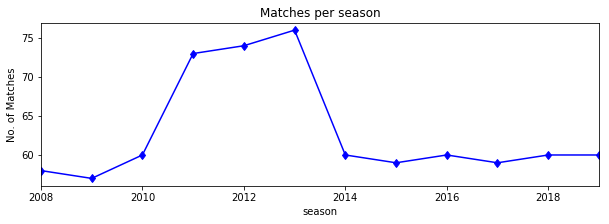

In [62]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax=df_matches.groupby("season")["id"].count().plot(kind="line",title="Matches per season", marker='d',color=['blue'],figsize=(10,3)) 
plt.ylabel("No. of Matches")

## 3. Total matches played by each team

In [63]:
matches_played = df_matches['team1'].value_counts()+ df_matches['team2'].value_counts()
matches_played

Chennai Super Kings            164
Deccan Chargers                 75
Delhi Capitals                  16
Delhi Daredevils               161
Gujarat Lions                   30
Kings XI Punjab                176
Kochi Tuskers Kerala            14
Kolkata Knight Riders          178
Mumbai Indians                 187
Pune Warriors                   46
Rajasthan Royals               147
Rising Pune Supergiant          16
Rising Pune Supergiants         14
Royal Challengers Bangalore    180
Sunrisers Hyderabad            108
dtype: int64

## 4. How many matches won by each team ?

In [64]:
matches_won = df_matches.groupby('winner').count()
matches_won["id"]

winner
Chennai Super Kings            100
Deccan Chargers                 29
Delhi Capitals                  10
Delhi Daredevils                67
Gujarat Lions                   13
Kings XI Punjab                 82
Kochi Tuskers Kerala             6
Kolkata Knight Riders           92
Mumbai Indians                 109
Pune Warriors                   12
Rajasthan Royals                75
Rising Pune Supergiant          10
Rising Pune Supergiants          5
Royal Challengers Bangalore     84
Sunrisers Hyderabad             58
Name: id, dtype: int64

## 5. Each Season Winner

In [65]:
season_winner = df_matches.groupby('season')['season','winner'].tail(1)
season_winner.sort_values(by="season",ascending=True)

,season,winner
116,2008,Rajasthan Royals
173,2009,Deccan Chargers
233,2010,Chennai Super Kings
306,2011,Chennai Super Kings
380,2012,Kolkata Knight Riders
456,2013,Mumbai Indians
516,2014,Kolkata Knight Riders
575,2015,Mumbai Indians
635,2016,Sunrisers Hyderabad
58,2017,Mumbai Indians
